In [32]:
pip install pandas matplotlib seaborn sklearn

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [135]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
df = pd.read_csv("D:/aiml/data_banknote.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


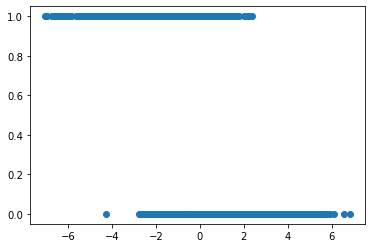

In [137]:
plt.scatter(df['variance'],df['class'])

(array([762.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 610.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

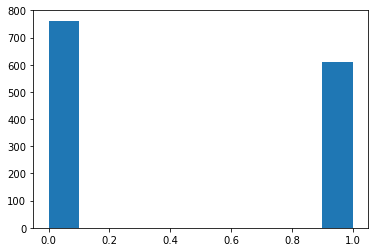

In [138]:
plt.hist(df['class'])

In [84]:
df['class'].unique()

array([0, 1], dtype=int64)

In [85]:
X = df.columns.drop("class")
y = df['class']
df = pd.get_dummies(df[X])
df.shape

(1372, 4)

# Train_Test_Split

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df, y,test_size=0.15,random_state=100)
print("Shape of X_train:", X_train.shape)

Shape of X_train: (1166, 4)


In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [88]:
train_accuracy = model.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)

Train accuracy =  0.9888507718696398


In [89]:
test_accuracy = model.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)


Test accuracy =  0.9951456310679612


# Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score
model = RandomForestClassifier() 
model.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
y_pred = model.predict(X_test) 
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.99      1.00      0.99        86

    accuracy                           1.00       206
   macro avg       0.99      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



# ANN(Classification)

In [92]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(50))
nn_model.fit(X_train,y_train)


MLPClassifier(hidden_layer_sizes=50)

In [93]:
predict_digit=nn_model.predict(X_train)

In [94]:
print(X_train.shape)

(1166, 4)


In [95]:
from sklearn.metrics import classification_report
# report based on tain data
print(classification_report(y_train,predict_digit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00       524

    accuracy                           1.00      1166
   macro avg       1.00      1.00      1.00      1166
weighted avg       1.00      1.00      1.00      1166



# SVM

In [96]:
svm_model_linear = SVC(kernel = 'linear', C = 1)
svm_model_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [97]:
ssvm_pred = svm_model_linear.predict(X_test)
ssvm_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [98]:
accuracy = svm_model_linear.score(X_test, y_test)
accuracy

0.9951456310679612

In [99]:
accuracy = svm_model_linear.score(X_train, y_train)
accuracy

0.9871355060034306

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
data_df = pd.read_csv("D:/AIML/mtcars.csv")
data_df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [102]:
print(data_df.shape)

(32, 12)


In [104]:
data_df =data_df[['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb']]
data_df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [105]:
cat_features = ["model", "mpg","cyl","disp","hp"]
data_df = pd.get_dummies(data_df,columns=cat_features)
print(data_df.columns)

Index(['drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'model_AMC Javelin',
       'model_Cadillac Fleetwood', 'model_Camaro Z28',
       ...
       'hp_123', 'hp_150', 'hp_175', 'hp_180', 'hp_205', 'hp_215', 'hp_230',
       'hp_245', 'hp_264', 'hp_335'],
      dtype='object', length=116)


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data_df[["vs", "am","gear"]]) 
data_normalized = scaler.transform(data_df[["vs", "am","gear"]]) 
data_normalized

array([[-0.8819171 ,  1.20894105,  0.43033148],
       [-0.8819171 ,  1.20894105,  0.43033148],
       [ 1.13389342,  1.20894105,  0.43033148],
       [ 1.13389342, -0.82717019, -0.94672926],
       [-0.8819171 , -0.82717019, -0.94672926],
       [ 1.13389342, -0.82717019, -0.94672926],
       [-0.8819171 , -0.82717019, -0.94672926],
       [ 1.13389342, -0.82717019,  0.43033148],
       [ 1.13389342, -0.82717019,  0.43033148],
       [ 1.13389342, -0.82717019,  0.43033148],
       [ 1.13389342, -0.82717019,  0.43033148],
       [-0.8819171 , -0.82717019, -0.94672926],
       [-0.8819171 , -0.82717019, -0.94672926],
       [-0.8819171 , -0.82717019, -0.94672926],
       [-0.8819171 , -0.82717019, -0.94672926],
       [-0.8819171 , -0.82717019, -0.94672926],
       [-0.8819171 , -0.82717019, -0.94672926],
       [ 1.13389342,  1.20894105,  0.43033148],
       [ 1.13389342,  1.20894105,  0.43033148],
       [ 1.13389342,  1.20894105,  0.43033148],
       [ 1.13389342, -0.82717019, -0.946

In [107]:
data_df_normalized=pd.DataFrame(data_normalized,columns=["vs", "am","gear"])
data_df_normalized=data_df_normalized.join(data_df[data_df.columns.drop(["vs", "am","gear"])])
data_df

,drat,wt,qsec,vs,am,gear,carb,model_AMC Javelin,model_Cadillac Fleetwood,model_Camaro Z28,...,hp_123,hp_150,hp_175,hp_180,hp_205,hp_215,hp_230,hp_245,hp_264,hp_335
0,3.90,2.620,16.46,0,1,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.90,2.875,17.02,0,1,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.85,2.320,18.61,1,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.08,3.215,19.44,1,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.15,3.440,17.02,0,0,3,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2.76,3.460,20.22,1,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.21,3.570,15.84,0,0,3,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,3.69,3.190,20.00,1,0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.92,3.150,22.90,1,0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.92,3.440,18.30,1,0,4,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [127]:
Y = data_df_normalized['carb']
X = data_df_normalized[data_df_normalized.columns.drop('carb')]
print(X.shape)

(32, 115)


In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)
X_train.shape , X_test.shape

((25, 115), (7, 115))

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [130]:
train_score=model.score(X_train,Y_train)
test_score=model.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

Train Score (R-Squared):  1.0
Test Score (R-Squared) 0.41497818747454096


In [131]:
from sklearn.metrics import mean_squared_error
train_predictions =nn_model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5
test_predictions =nn_model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)

Train RMSE :  0.0
Test RMSE :  1.7320508075688772


In [132]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(50))
nn_model.fit(X_train,Y_train)
predicted_digit = nn_model.predict(X_train)
print(X_train.shape)

(25, 115)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [133]:
train_score=nn_model.score(X_train,Y_train)
test_score=nn_model.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

Train Score (R-Squared):  1.0
Test Score (R-Squared) 0.7142857142857143


In [134]:
from sklearn.metrics import mean_squared_error
train_predictions =nn_model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5
test_predictions =nn_model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)

Train RMSE :  0.0
Test RMSE :  1.3627702877384937
